In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nbtools import auto_plot_style

In [2]:
auto_plot_style()

In [4]:
filename = "wires_streamline"
sls = pd.DataFrame(np.loadtxt(filename, skiprows=8), columns="x y s".split())

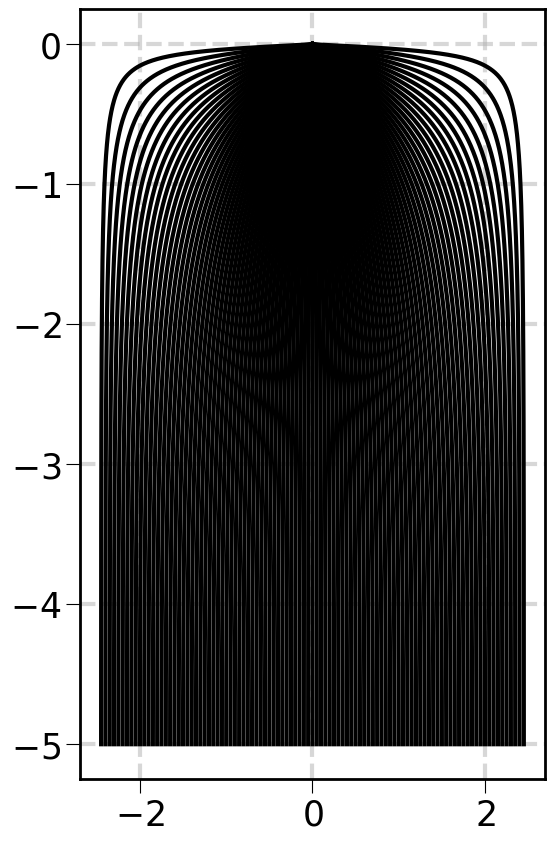

In [14]:
plt.figure(figsize=(6, 10))
for i, sl in sls.groupby("s"):
    plt.plot(sl.x, sl.y, "k")
plt.grid()

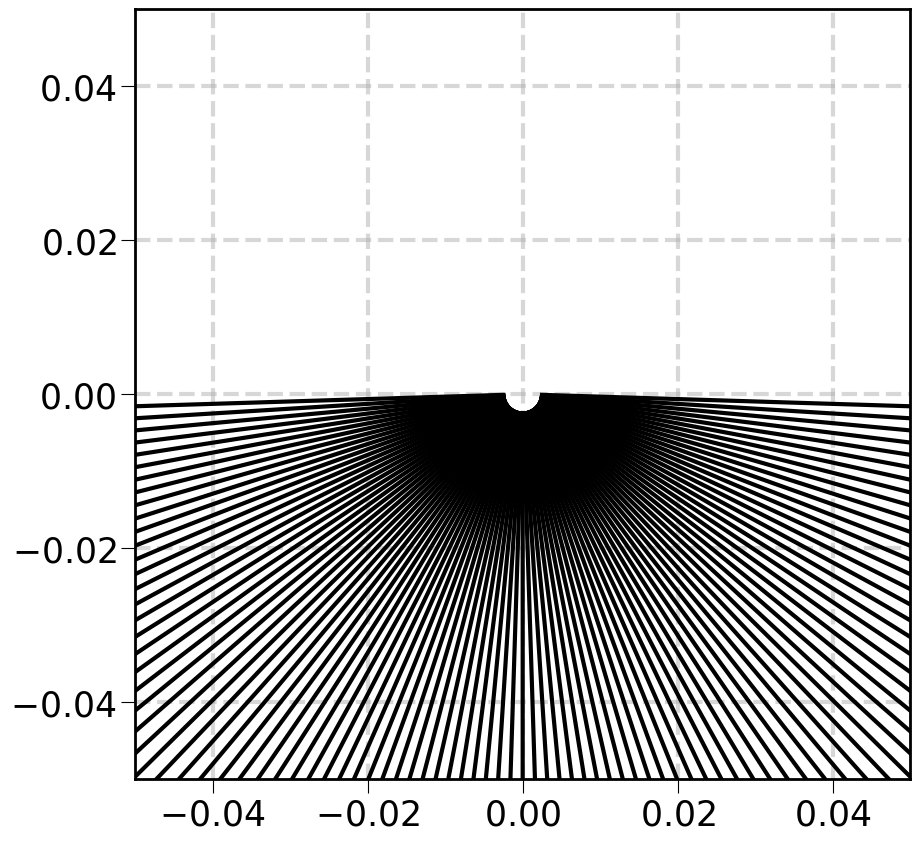

In [15]:
plt.figure(figsize=(10, 10))
for _, sl in sls.groupby("s"):
    plt.plot(sl.x, sl.y, "k")
plt.xlim(-5e-2, 5e-2)
plt.ylim(-5e-2, 5e-2)
plt.grid()

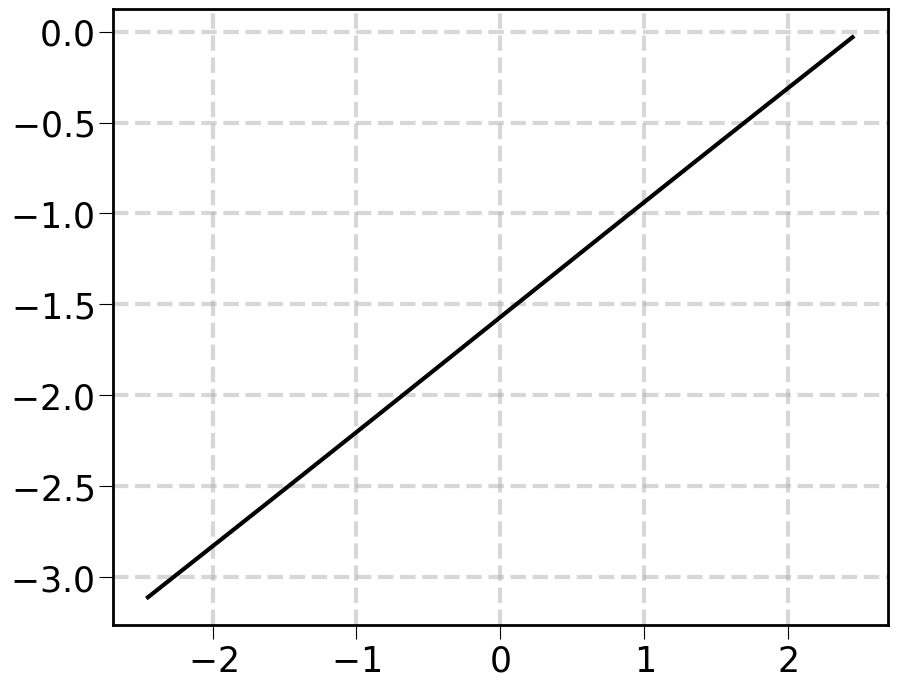

In [37]:
end   = sls.groupby("s").first()
start = sls.groupby("s").last()
merged = pd.DataFrame.join(start, end, lsuffix="_start", rsuffix="_end")
merged = merged.assign(phi_end=np.arctan2(merged.y_end, merged.x_end))
plt.plot(merged.x_start, merged.phi_end)
plt.grid()